# This is the main notebook file for the machine learning program

In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
%run read_csv_files.ipynb

2023-02-15 18:12:56.757053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Begin with scaled data where the target value predicts whether the combined score of the home and away team will be over the over/under line (Over_Under_Signal = '1')
## Part 1: Neural Network with Deep Learning for 10 Seasons

In [2]:
# Drop the 'Date' column from the dataframe
ten_seasons_nn = df_combined_2011_2021.drop(columns=['Date'])

# Display the dataframe
ten_seasons_nn

,Home_Team,Away_Team,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,New York Knicks,Boston Celtics,195.5,5.0,-210.0,185.0,210.0,2.0
1,Dallas Mavericks,Miami Heat,190.5,3.5,185.0,-210.0,199.0,-11.0
2,Los Angeles Lakers,Chicago Bulls,186.0,1.5,205.0,-245.0,175.0,-1.0
3,Oklahoma City Thunder,Orlando Magic,197.0,7.5,-380.0,310.0,186.0,8.0
4,Golden State Warriors,Los Angeles Clippers,212.0,4.0,175.0,-200.0,191.0,-19.0
...,...,...,...,...,...,...,...,...
12576,Phoenix Suns,Milwaukee Bucks,221.0,5.5,-180.0,160.0,226.0,10.0
12577,Milwaukee Bucks,Phoenix Suns,222.0,3.5,-210.0,180.0,220.0,20.0
12578,Milwaukee Bucks,Phoenix Suns,220.5,3.5,-190.0,170.0,212.0,6.0
12579,Phoenix Suns,Milwaukee Bucks,218.5,4.0,-170.0,150.0,242.0,-4.0


In [3]:
# Review the data types
ten_seasons_nn.dtypes

Home_Team               object
Away_Team               object
Over_Under             float64
Spread                 float64
Moneyline_Home_Team    float64
Moneyline_Away_Team    float64
Game_Total_Points      float64
Win_Margin             float64
dtype: object

In [4]:
# Create a list of the categorical variables
categorical_variables_1 = list(
    ten_seasons_nn.dtypes[ten_seasons_nn.dtypes == 'object'].index
)

# Display the list
categorical_variables_1

['Home_Team', 'Away_Team']

In [5]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(
    sparse = False
)

In [6]:
# Encode the categorical variables into numerical format
encoded_data_1 = enc.fit_transform(
    ten_seasons_nn[categorical_variables_1]
)

In [7]:
# Create a dataframe with the encoded data
encoded_ten_seasons_df = pd.DataFrame(
    encoded_data_1,
    columns = enc.get_feature_names_out(
        categorical_variables_1
    )
)

# Display the dataframe
encoded_ten_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Oklahoma City Thunder,Away_Team_Orlando Magic,Away_Team_Philadelphia 76ers,Away_Team_Phoenix Suns,Away_Team_Portland Trail Blazers,Away_Team_Sacramento Kings,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create a new variable for the exisiting numerical data
numerical_variables_1 = ten_seasons_nn.drop(
    columns = categorical_variables_1
)

# Display the numerical variables
numerical_variables_1

,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,195.5,5.0,-210.0,185.0,210.0,2.0
1,190.5,3.5,185.0,-210.0,199.0,-11.0
2,186.0,1.5,205.0,-245.0,175.0,-1.0
3,197.0,7.5,-380.0,310.0,186.0,8.0
4,212.0,4.0,175.0,-200.0,191.0,-19.0
...,...,...,...,...,...,...
12576,221.0,5.5,-180.0,160.0,226.0,10.0
12577,222.0,3.5,-210.0,180.0,220.0,20.0
12578,220.5,3.5,-190.0,170.0,212.0,6.0
12579,218.5,4.0,-170.0,150.0,242.0,-4.0


In [9]:
# Add the numerical data and the categorical encoded data to one dataframe
encoded_ten_seasons_df = pd.concat(
    [encoded_ten_seasons_df,
    numerical_variables_1],
    axis=1
)

# Display the dataframe
encoded_ten_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0
12578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0
12579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0


In [10]:
# Add a "Over_Under_Signal" column which tracks the "Game_Total_Points" column
encoded_ten_seasons_df['Over_Under_Signal'] = 0

# When the "Game_Total_Points" is greater than or equal to  the "Over_Under" column, set Over_Under_Signal to 1
encoded_ten_seasons_df.loc[(encoded_ten_seasons_df['Game_Total_Points']) >= encoded_ten_seasons_df['Over_Under'], 'Over_Under_Signal'] = 1

# When the "Game_Total_Points" is less than the "Over_Under" column, set Over_Under_Signal to -1
encoded_ten_seasons_df.loc[(encoded_ten_seasons_df['Game_Total_Points']) < encoded_ten_seasons_df['Over_Under'], 'Over_Under_Signal'] = -1

# Display the dataframe
encoded_ten_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin,Over_Under_Signal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0,-1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0,-1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0,1
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0,-1
12578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0,-1
12579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0,1


In [11]:
# Change the 'Over_Under_Signal' column to float data type
encoded_ten_seasons_df['Over_Under_Signal'] = encoded_ten_seasons_df['Over_Under_Signal'].astype(float)

# Display dtypes
encoded_ten_seasons_df.dtypes

Home_Team_Atlanta Hawks        float64
Home_Team_Boston Celtics       float64
Home_Team_Brooklyn Nets        float64
Home_Team_Charlotte Bobcats    float64
Home_Team_Chicago Bulls        float64
                                ...   
Moneyline_Home_Team            float64
Moneyline_Away_Team            float64
Game_Total_Points              float64
Win_Margin                     float64
Over_Under_Signal              float64
Length: 69, dtype: object

In [12]:
# Display the amount of each Over_Under_Signal option
encoded_ten_seasons_df['Over_Under_Signal'].value_counts()

 1.0    6331
-1.0    6250
Name: Over_Under_Signal, dtype: int64

In [13]:
# Set the y (target value) to 'Over_Under_Signal' column
y = encoded_ten_seasons_df['Over_Under_Signal']

# Set the X (features) to all columns except 'Over_Under_Signal'
X = encoded_ten_seasons_df.drop(columns=['Over_Under_Signal'])

# Display a sample of each
display(y[:5])
display(X.head())

0    1.0
1    1.0
2   -1.0
3   -1.0
4   -1.0
Name: Over_Under_Signal, dtype: float64

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0


In [14]:
# Split the data into training and testing variables
X_train, X_test, y_train, y_test_1 = train_test_split(
    X,
    y,
    random_state=1
)

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled_1 = X_scaler.transform(X_train)
X_test_scaled_1 = X_scaler.transform(X_test)

In [16]:
# Define the amount of outputs
outputs = 1

# Display the amount of outputs
print(f"The amount of outputs for ALL the models tested in this file will be {outputs}.")

The amount of outputs for ALL the models tested in this file will be 1.


In [17]:
# Define the number of inputs to the model
inputs_1 = len(X_train.iloc[0])

# Display the amount of inputs
print(f"The amount of inputs is {inputs_1}.")

# Define the first hidden layer
hidden_1_layer_1 = ((inputs_1 + 1) // 2) + 33

# Display the amount of nodes
print(f"The amount of nodes in the first hidden layer is {hidden_1_layer_1}.")

# Define the second hidden layer
hidden_1_layer_2 = ((hidden_1_layer_1 + 1) // 2) + 10

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_1_layer_2}.")

# Define the third hidden layer
hidden_1_layer_3 = ((hidden_1_layer_2 + 1) // 2)

# Display the amount of nodes
print(f"The amount of nodes in the third hidden layer is {hidden_1_layer_3}.")

The amount of inputs is 68.
The amount of nodes in the first hidden layer is 67.
The amount of nodes in the second hidden layer is 44.
The amount of nodes in the third hidden layer is 22.


In [18]:
# Create a Sequential mode instance
neural_network_1 = Sequential()

2023-02-15 18:13:02.784536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Add the hidden layers

# First layer
neural_network_1.add(
    Dense(
        units=hidden_1_layer_1,
        input_dim=inputs_1,
        activation='LeakyReLU'
    )
)

# Second layer
neural_network_1.add(
    Dense(
        units=hidden_1_layer_2,
        activation='LeakyReLU'
    )
)

# Third layer
neural_network_1.add(
    Dense(
        units=hidden_1_layer_3,
        activation='LeakyReLU'
    )
)


# Add the output layer
neural_network_1.add(
    Dense(
        units=outputs,
        activation='linear'
    )
)

In [20]:
# Display the Sequential model summary
neural_network_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 67)                4623      
                                                                 
 dense_1 (Dense)             (None, 44)                2992      
                                                                 
 dense_2 (Dense)             (None, 22)                990       
                                                                 
 dense_3 (Dense)             (None, 1)                 23        
                                                                 
Total params: 8,628
Trainable params: 8,628
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Add a callback to prevent overfitting the model. This callback will be used in ALL compilations for models.
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=0,
    mode="min",
)

In [22]:
# Compile the Sequential model
neural_network_1.compile(
    loss="mse",
    optimizer="adam", 
    metrics=["accuracy"]
)

In [23]:
# Fit the model using 150 epochs
fit_model_1 = neural_network_1.fit(
    X_train_scaled_1,
    y_train,
    epochs=80,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/80
266/266 [==============================] - 1s 2ms/step - loss: 0.7388 - accuracy: 0.1716 - val_loss: 0.5847 - val_accuracy: 0.2362
Epoch 2/80
266/266 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.2301 - val_loss: 0.5027 - val_accuracy: 0.2479
Epoch 3/80
266/266 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.2532 - val_loss: 0.4821 - val_accuracy: 0.2172
Epoch 4/80
266/266 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.2698 - val_loss: 0.4255 - val_accuracy: 0.2553
Epoch 5/80
266/266 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.2912 - val_loss: 0.3772 - val_accuracy: 0.2532
Epoch 6/80
266/266 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.3254 - val_loss: 0.3155 - val_accuracy: 0.3263
Epoch 7/80
266/266 [==============================] - 0s 1ms/step - loss: 0.2548 - accuracy: 0.3672 - val_loss: 0.2433 - val_accuracy: 0.3877
Epoch 

In [24]:
# Save the first neural network model and export it to am `.h5` file
file_path = Path("Models/over_under_nn_1.h5")

# Export the model to an HDF5 file
neural_network_1.save(file_path)

In [25]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neural_network_1.evaluate(
    X_test_scaled_1,
    y_test_1, 
    verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

99/99 - 0s - loss: 0.0796 - accuracy: 0.4771 - 186ms/epoch - 2ms/step
Loss: 0.0795726478099823, Accuracy: 0.4771137833595276


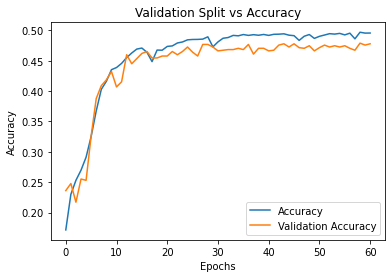

In [26]:
# Plot the validation split against accuracy to verify the model is not overfitting
plt.plot(fit_model_1.history['accuracy'])
plt.plot(fit_model_1.history['val_accuracy'])
plt.legend(['Accuracy','Validation Accuracy'])
plt.title("Validation Split vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

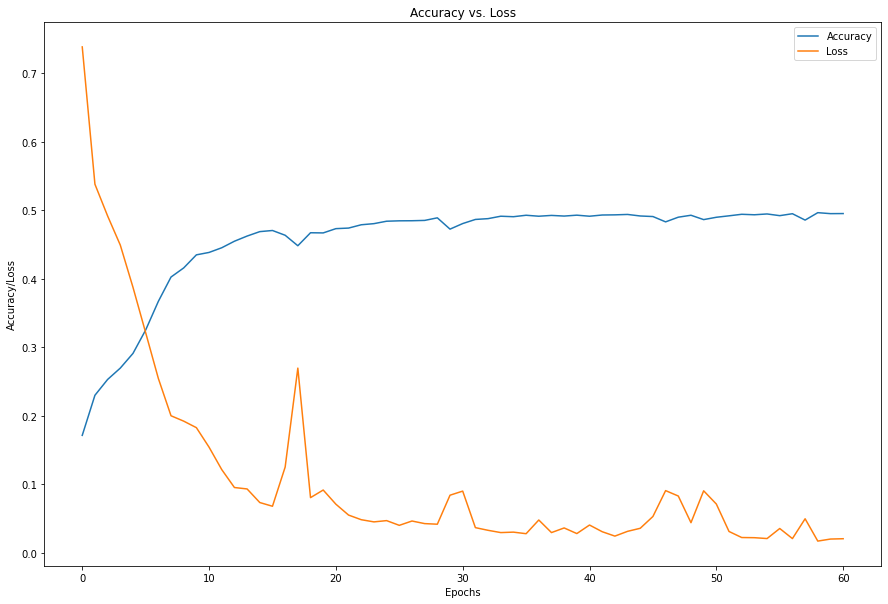

In [27]:
# Plot the accuracy against loss to verify accuracy increasing while loss decreasing
plt.plot(fit_model_1.history['accuracy'])
plt.plot(fit_model_1.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.title("Accuracy vs. Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [28]:
# Make predictions for 10 season 3 hidden layer 
predictions = (neural_network_1.predict(X_test_scaled_1) > 0.5).astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test_1})

# Display sample data
results.head(10)

99/99 [==============================] - 0s 948us/step


,predictions,actual
9299,1,1.0
8157,1,1.0
8148,0,-1.0
12272,1,1.0
8409,1,1.0
7202,0,-1.0
3996,1,1.0
863,1,1.0
988,1,1.0
9737,0,-1.0


## Report for Part 1:
With 10 seasons of learning data scaled, using LeakyReLU for the inner layers, linear for the outer layer, and 80 epochs, we are receiving about a 47.7% accuracy.

## Part 2: Neural Network with Deep Learning for 5 Seasons

In [29]:
# Drop the 'Date' column from the dataframe
five_seasons_nn = df_combined_2016_2021.drop(columns=['Date'])

# Display the dataframe
five_seasons_nn

,Home_Team,Away_Team,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,Cleveland Cavaliers,New York Knicks,205.5,9.5,-450.0,355.0,205.0,29.0
1,Portland Trail Blazers,Utah Jazz,194.0,6.0,-235.0,195.0,217.0,9.0
2,Golden State Warriors,San Antonio Spurs,210.5,8.0,-400.0,325.0,229.0,-29.0
3,Orlando Magic,Miami Heat,202.0,4.0,-155.0,135.0,204.0,-12.0
4,Indiana Pacers,Dallas Mavericks,207.5,5.0,-215.0,185.0,251.0,9.0
...,...,...,...,...,...,...,...,...
6242,Phoenix Suns,Milwaukee Bucks,221.0,5.5,-180.0,160.0,226.0,10.0
6243,Milwaukee Bucks,Phoenix Suns,222.0,3.5,-210.0,180.0,220.0,20.0
6244,Milwaukee Bucks,Phoenix Suns,220.5,3.5,-190.0,170.0,212.0,6.0
6245,Phoenix Suns,Milwaukee Bucks,218.5,4.0,-170.0,150.0,242.0,-4.0


In [30]:
# Review the data types
five_seasons_nn.dtypes

Home_Team               object
Away_Team               object
Over_Under             float64
Spread                 float64
Moneyline_Home_Team    float64
Moneyline_Away_Team    float64
Game_Total_Points      float64
Win_Margin             float64
dtype: object

In [31]:
# Create a list of the categorical variables
categorical_variables_2 = list(
    five_seasons_nn.dtypes[five_seasons_nn.dtypes == 'object'].index
)

# Display the list
categorical_variables_2

['Home_Team', 'Away_Team']

In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(
    sparse = False
)

In [33]:
# Encode the categorical variables into numerical format
encoded_data_2 = enc.fit_transform(
    five_seasons_nn[categorical_variables_2]
)

In [34]:
# Create a dataframe with the encoded data
encoded_five_seasons_df = pd.DataFrame(
    encoded_data_2,
    columns = enc.get_feature_names_out(
        categorical_variables_2
    )
)

# Display the dataframe
encoded_five_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Oklahoma City Thunder,Away_Team_Orlando Magic,Away_Team_Philadelphia 76ers,Away_Team_Phoenix Suns,Away_Team_Portland Trail Blazers,Away_Team_Sacramento Kings,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Create a new variable for the exisiting numerical data
numerical_variables_2 = five_seasons_nn.drop(
    columns = categorical_variables_2
)

# Display numerical variables
numerical_variables_2

,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,205.5,9.5,-450.0,355.0,205.0,29.0
1,194.0,6.0,-235.0,195.0,217.0,9.0
2,210.5,8.0,-400.0,325.0,229.0,-29.0
3,202.0,4.0,-155.0,135.0,204.0,-12.0
4,207.5,5.0,-215.0,185.0,251.0,9.0
...,...,...,...,...,...,...
6242,221.0,5.5,-180.0,160.0,226.0,10.0
6243,222.0,3.5,-210.0,180.0,220.0,20.0
6244,220.5,3.5,-190.0,170.0,212.0,6.0
6245,218.5,4.0,-170.0,150.0,242.0,-4.0


In [36]:
# Add the numerical data and the categorical encoded data to one dataframe
encoded_five_seasons_df = pd.concat(
    [encoded_five_seasons_df,
    numerical_variables_2],
    axis=1
)

# Display the dataframe
encoded_five_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0
6243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0
6244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0


In [37]:
encoded_five_seasons_df['Over_Under_Signal'] = 0.0

# When the "Game_Total_Points" is greater than or equal to the "Over_Under" column, set Over_Under_Signal to 1
encoded_five_seasons_df.loc[(encoded_five_seasons_df['Game_Total_Points']) >= encoded_five_seasons_df['Over_Under'], 'Over_Under_Signal'] = 1

# When the "Game_Total_Points" is less than the "Over_Under" column, set Over_Under_Signal to -1
encoded_five_seasons_df.loc[(encoded_five_seasons_df['Game_Total_Points']) < encoded_five_seasons_df['Over_Under'], 'Over_Under_Signal'] = -1

# Display the dataframe
encoded_five_seasons_df

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin,Over_Under_Signal
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0,1.0
6243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0,-1.0
6244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0,-1.0
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0,1.0


In [38]:
# Change the 'Over_Under_Signal' column to float data type
encoded_five_seasons_df['Over_Under_Signal'] = encoded_five_seasons_df['Over_Under_Signal'].astype(float)
encoded_five_seasons_df.dtypes

Home_Team_Atlanta Hawks        float64
Home_Team_Boston Celtics       float64
Home_Team_Brooklyn Nets        float64
Home_Team_Charlotte Bobcats    float64
Home_Team_Chicago Bulls        float64
                                ...   
Moneyline_Home_Team            float64
Moneyline_Away_Team            float64
Game_Total_Points              float64
Win_Margin                     float64
Over_Under_Signal              float64
Length: 67, dtype: object

In [39]:
# Display the amount of each Over_Under_Signal option
encoded_five_seasons_df['Over_Under_Signal'].value_counts()

 1.0    3139
-1.0    3108
Name: Over_Under_Signal, dtype: int64

In [40]:
# Set the y (target value) to 'Over_Under_Signal' column
y = encoded_five_seasons_df['Over_Under_Signal']

# Set the X (features) to all columns except 'Over_Under_Signal'
X = encoded_five_seasons_df.drop(columns=['Over_Under_Signal'])

# Display a sample of each
display(y[:5])
display(X.head())

0   -1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Over_Under_Signal, dtype: float64

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0


In [41]:
# Split the data into training and testing variables
X_train, X_test, y_train, y_test_2 = train_test_split(
    X,
    y,
    random_state=1
)

In [42]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled_2 = X_scaler.transform(X_train)
X_test_scaled_2 = X_scaler.transform(X_test)

In [43]:
# Define the number of inputs to the model
inputs_2 = len(X_train.iloc[0])

# Display the amount of inputs
print(f"The amount of inputs is {inputs_2}.")

# Define the first hidden layer
hidden_2_layer_1 = ((inputs_2 + 1) // 2) + 33

# Display the amount of nodes
print(f"The amount of nodes in the first hidden layer is {hidden_2_layer_1}.")

# Define the second hidden layer
hidden_2_layer_2 = ((hidden_2_layer_1 + 1) // 2) + 10

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_2_layer_2}.")

# Define the third hidden layer
hidden_2_layer_3 = ((hidden_2_layer_2 + 1) // 2)

# Display the amount of nodes
print(f"The amount of nodes in the third hidden layer is {hidden_2_layer_3}.")

The amount of inputs is 66.
The amount of nodes in the first hidden layer is 66.
The amount of nodes in the second hidden layer is 43.
The amount of nodes in the third hidden layer is 22.


In [44]:
# Create a Sequential mode instance
neural_network_2 = Sequential()

In [45]:
# Add the hidden layers
# First layer
neural_network_2.add(
    Dense(
        units=hidden_2_layer_1,
        input_dim=inputs_2,
        activation='LeakyReLU'
    )
)

# Second layer
neural_network_2.add(
    Dense(
        units=hidden_2_layer_2,
        activation='LeakyReLU'
    )
)

# Third layer
neural_network_2.add(
    Dense(
        units=hidden_2_layer_3,
        activation='LeakyReLU'
    )
)

# Add the output layer
neural_network_2.add(
    Dense(
        units=outputs,
        activation='linear'
    )
)

In [46]:
# Display the Sequential model summary
neural_network_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 66)                4422      
                                                                 
 dense_5 (Dense)             (None, 43)                2881      
                                                                 
 dense_6 (Dense)             (None, 22)                968       
                                                                 
 dense_7 (Dense)             (None, 1)                 23        
                                                                 
Total params: 8,294
Trainable params: 8,294
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the Sequential model
neural_network_2.compile(
    loss="mse",
    optimizer="adam", 
    metrics=["accuracy"]
)

In [48]:
# Fit the model using 150 epochs
fit_model_2 = neural_network_2.fit(
    X_train_scaled_2,
    y_train,
    epochs=130,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/130
132/132 [==============================] - 1s 2ms/step - loss: 0.7726 - accuracy: 0.1404 - val_loss: 0.5367 - val_accuracy: 0.2154
Epoch 2/130
132/132 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.2362 - val_loss: 0.5104 - val_accuracy: 0.2708
Epoch 3/130
132/132 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.2479 - val_loss: 0.4791 - val_accuracy: 0.2644
Epoch 4/130
132/132 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.2692 - val_loss: 0.4617 - val_accuracy: 0.2857
Epoch 5/130
132/132 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.2780 - val_loss: 0.4474 - val_accuracy: 0.2814
Epoch 6/130
132/132 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.2849 - val_loss: 0.4191 - val_accuracy: 0.3134
Epoch 7/130
132/132 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.3164 - val_loss: 0.3786 - val_accuracy: 0.3326

In [49]:
# Save the neural network model and export it to am `.h5` file
file_path = Path("Models/over_under_nn_2.h5")

# Export the model to an HDF5 file
neural_network_2.save(file_path)

In [50]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neural_network_2.evaluate(
    X_test_scaled_2,
    y_test_2, 
    verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

49/49 - 0s - loss: 0.1387 - accuracy: 0.4494 - 54ms/epoch - 1ms/step
Loss: 0.13874316215515137, Accuracy: 0.44942381978034973


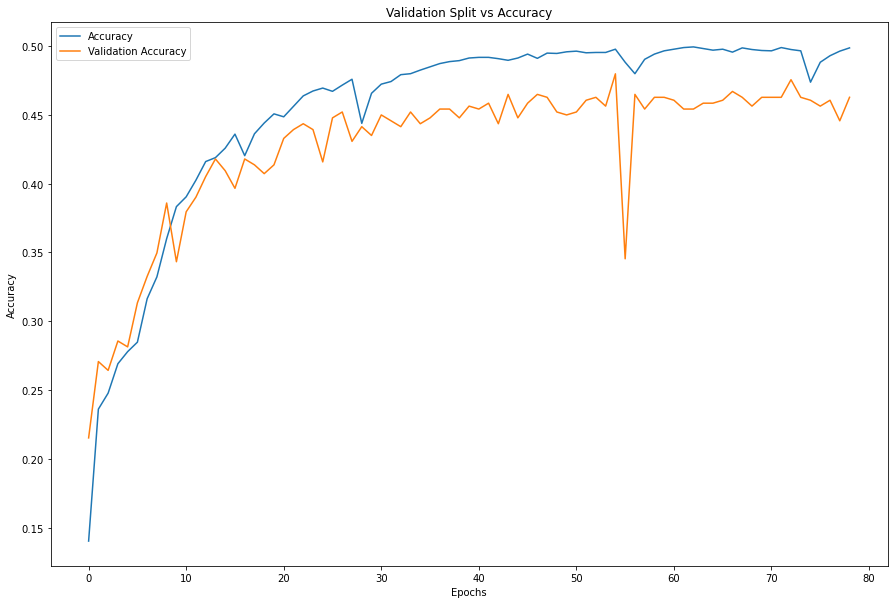

In [51]:
# Plot the validation split against accuracy to verify the model is not overfitting
plt.plot(fit_model_2.history['accuracy'])
plt.plot(fit_model_2.history['val_accuracy'])
plt.legend(['Accuracy','Validation Accuracy'])
plt.title("Validation Split vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

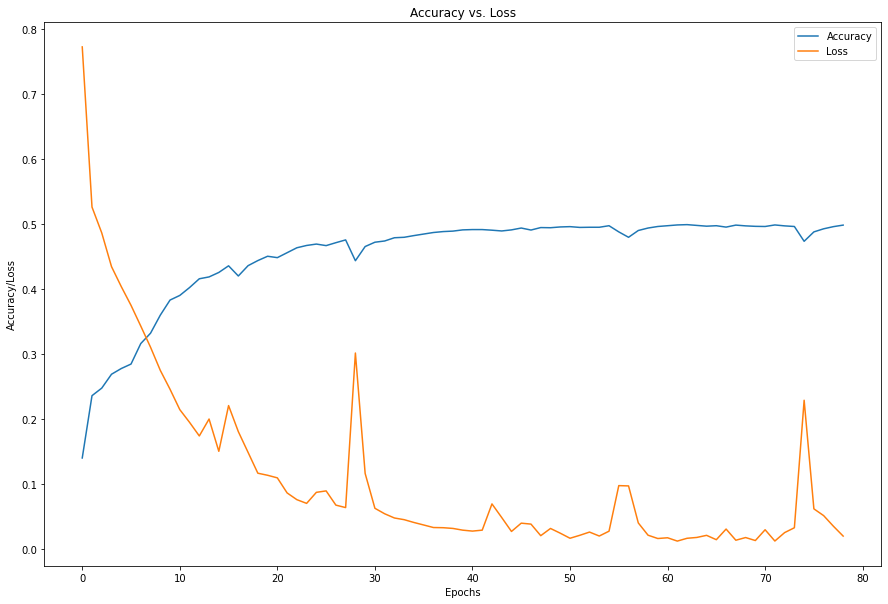

In [52]:
# Plot the accuracy against loss to verify accuracy increasing while loss decreasing
plt.plot(fit_model_2.history['accuracy'])
plt.plot(fit_model_2.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.title("Accuracy vs. Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [53]:
# Make predictions for 10 season 3 hidden layer 
predictions = (neural_network_2.predict(X_test_scaled_2) > 0.5).astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test_2})

# Display sample data
results.head(10)

49/49 [==============================] - 0s 718us/step


,predictions,actual
5046,0,1.0
1714,0,-1.0
1394,0,-1.0
2721,0,-1.0
758,0,-1.0
5533,1,1.0
433,0,-1.0
5867,1,1.0
3285,0,-1.0
4584,1,1.0


## Report for Part 2:
With 5 seasons of learning data scaled, using LeakyRelu for the input layers, linear for the output layer, 130 epochs, we are receiving about a 44.9% accuracy.

## Part 3: Neural Network with Deep Learning for 10 Seasons using 4 LeakyReLU inner layers, linear output layer, and 100 Epochs

In [54]:
# Display the dataframe, reuse the encoded data with ten seasons
display(encoded_ten_seasons_df)

# Display the amount of each Over_Under_Signal option
display(encoded_ten_seasons_df['Over_Under_Signal'].value_counts())

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin,Over_Under_Signal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0,1.0
12577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0,-1.0
12578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0,-1.0
12579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0,1.0


 1.0    6331
-1.0    6250
Name: Over_Under_Signal, dtype: int64

In [55]:
# Set the y (target value) to 'Over_Under_Signal' column
y = encoded_ten_seasons_df['Over_Under_Signal']

# Set the X (features) to all columns except 'Over_Under_Signal'
X = encoded_ten_seasons_df.drop(columns=['Over_Under_Signal'])

# Display a sample of each
display(y[:5])
display(X.head())

0    1.0
1    1.0
2   -1.0
3   -1.0
4   -1.0
Name: Over_Under_Signal, dtype: float64

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,195.5,5.0,-210.0,185.0,210.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,190.5,3.5,185.0,-210.0,199.0,-11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,186.0,1.5,205.0,-245.0,175.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,197.0,7.5,-380.0,310.0,186.0,8.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,212.0,4.0,175.0,-200.0,191.0,-19.0


In [56]:
# Split the data into training and testing variables
X_train, X_test, y_train, y_test_3 = train_test_split(
    X,
    y,
    random_state=1
)

In [57]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled_3 = X_scaler.transform(X_train)
X_test_scaled_3 = X_scaler.transform(X_test)

In [58]:
# Define the number of inputs
inputs_3 = len(X_train.iloc[0])

# Display the amount of inputs
print(f"The amount of inputs is {inputs_3}.")

# Define the first hidden layer
hidden_3_layer_1 = ((inputs_3) // 2) + 23

# Display the amount of nodes
print(f"The amount of nodes in the first hidden layer is {hidden_3_layer_1}.")

# Define the second hidden layer
hidden_3_layer_2 = ((hidden_3_layer_1) // 2) + 11

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_3_layer_2}.")

# Define the second hidden layer
hidden_3_layer_3 = ((hidden_3_layer_2) // 2) + 4

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_3_layer_3}.")

# Define the second hidden layer
hidden_3_layer_4 = ((hidden_3_layer_3) // 2)

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_3_layer_4}.")

The amount of inputs is 68.
The amount of nodes in the first hidden layer is 57.
The amount of nodes in the second hidden layer is 39.
The amount of nodes in the second hidden layer is 23.
The amount of nodes in the second hidden layer is 11.


In [59]:
# Create a Sequential model instance
neural_network_3 = Sequential()

In [60]:
# Add the hidden layers
# First layer
neural_network_3.add(
    Dense(
        units=hidden_3_layer_1,
        input_dim=inputs_3,
        activation='LeakyReLU'
    )
)

# Second layer
neural_network_3.add(
    Dense(
        units=hidden_3_layer_2,
        activation='LeakyReLU'
    )
)

# Third layer
neural_network_3.add(
    Dense(
        units=hidden_3_layer_3,
        activation='LeakyReLU'
    )
)

# Fourth layer
neural_network_3.add(
    Dense(
        units=hidden_3_layer_4,
        activation='LeakyReLU'
    )
)

# Add the output layer
neural_network_3.add(
    Dense(
        units=outputs,
        activation='linear'
    )
)

In [61]:
# Display the Sequential model summary
neural_network_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 57)                3933      
                                                                 
 dense_9 (Dense)             (None, 39)                2262      
                                                                 
 dense_10 (Dense)            (None, 23)                920       
                                                                 
 dense_11 (Dense)            (None, 11)                264       
                                                                 
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
Total params: 7,391
Trainable params: 7,391
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the Sequential model
neural_network_3.compile(
    loss="mse",
    optimizer="adam", 
    metrics=["accuracy"]
)

In [63]:
# Fit the model using 150 epochs
fit_model_3 = neural_network_3.fit(
    X_train_scaled_3,
    y_train,
    epochs=100,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/100
266/266 [==============================] - 1s 2ms/step - loss: 0.7216 - accuracy: 0.1596 - val_loss: 0.5311 - val_accuracy: 0.2564
Epoch 2/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.2642 - val_loss: 0.4302 - val_accuracy: 0.3443
Epoch 3/100
266/266 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.3048 - val_loss: 0.3545 - val_accuracy: 0.2934
Epoch 4/100
266/266 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.3566 - val_loss: 0.2668 - val_accuracy: 0.3496
Epoch 5/100
266/266 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.4061 - val_loss: 0.2166 - val_accuracy: 0.4216
Epoch 6/100
266/266 [==============================] - 0s 1ms/step - loss: 0.1466 - accuracy: 0.4356 - val_loss: 0.1806 - val_accuracy: 0.4375
Epoch 7/100
266/266 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.4512 - val_loss: 0.2328 - val_accuracy: 0.4576

In [64]:
# Save the neural network model and export it to am `.h5` file
file_path = Path("Models/over_under_nn_3.h5")

# Export the model to an HDF5 file
neural_network_3.save(file_path)

In [65]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neural_network_3.evaluate(
    X_test_scaled_3,
    y_test_3, 
    verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

99/99 - 0s - loss: 0.0990 - accuracy: 0.4787 - 85ms/epoch - 861us/step
Loss: 0.09902193397283554, Accuracy: 0.478703111410141


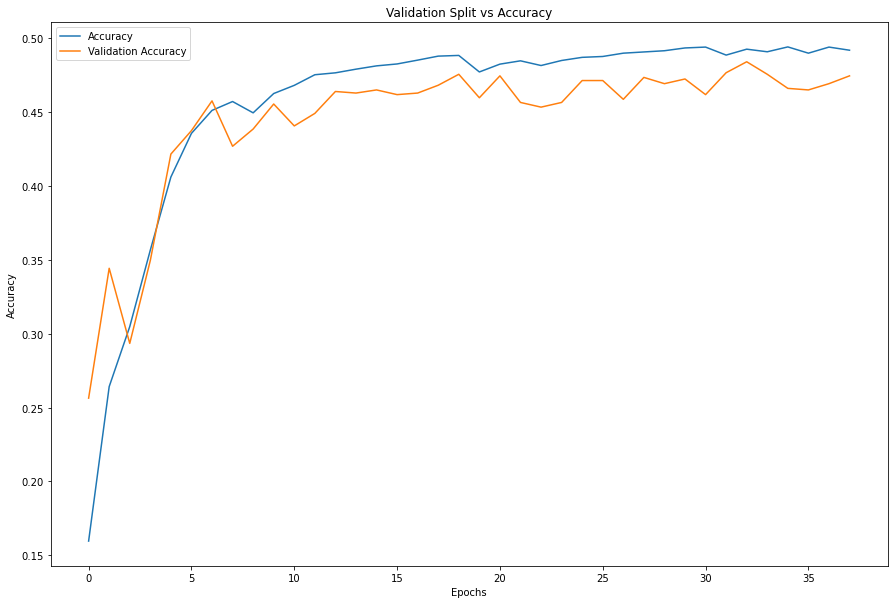

In [66]:
# Plot the validation split against accuracy to verify the model is not overfitting
plt.plot(fit_model_3.history['accuracy'])
plt.plot(fit_model_3.history['val_accuracy'])
plt.legend(['Accuracy','Validation Accuracy'])
plt.title("Validation Split vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

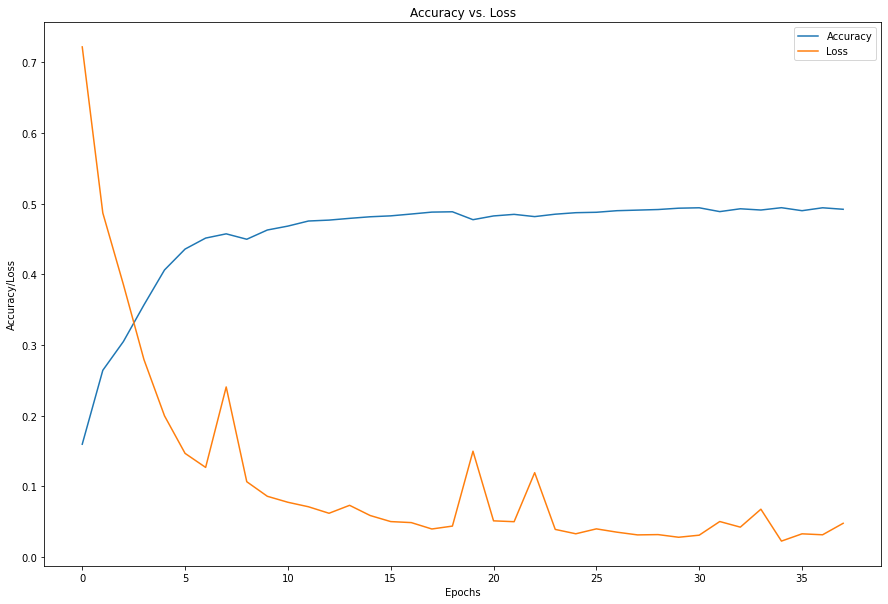

In [67]:
# Plot the accuracy against loss to verify accuracy increasing while loss decreasing
plt.plot(fit_model_3.history['accuracy'])
plt.plot(fit_model_3.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.title("Accuracy vs. Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [68]:
# Make predictions for 10 season 3 hidden layer 
predictions = (neural_network_3.predict(X_test_scaled_3) > 0.5).astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test_3})

# Display sample data
results.head(10)

99/99 [==============================] - 0s 722us/step


,predictions,actual
9299,1,1.0
8157,1,1.0
8148,0,-1.0
12272,1,1.0
8409,1,1.0
7202,0,-1.0
3996,1,1.0
863,1,1.0
988,1,1.0
9737,0,-1.0


## Report for Part 3:
With 10 seasons of learning data scaled, using four hidden layers with LeakyReLU activation, outer layer linear activation, and 100 epochs, we are receiving about a 47.8% accuracy. The linear activation seems to be making the biggest difference. We also notice that the loss is astronomically lower with this actvation.

## Part 4: Neural Network with Deep Learning for Five Seasons using LeakyReLU, linear, and 60 Epochs

In [69]:
# Display the dataframe, reuse the encoded data with five seasons
display(encoded_five_seasons_df)

# Display the amount of each Over_Under_Signal option
display(encoded_five_seasons_df['Over_Under_Signal'].value_counts())

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin,Over_Under_Signal
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,221.0,5.5,-180.0,160.0,226.0,10.0,1.0
6243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,222.0,3.5,-210.0,180.0,220.0,20.0,-1.0
6244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220.5,3.5,-190.0,170.0,212.0,6.0,-1.0
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,218.5,4.0,-170.0,150.0,242.0,-4.0,1.0


 1.0    3139
-1.0    3108
Name: Over_Under_Signal, dtype: int64

In [70]:
# Set the y (target value) to 'Over_Under_Signal' column
y = encoded_five_seasons_df['Over_Under_Signal']

# Set the X (features) to all columns except 'Over_Under_Signal'
X = encoded_five_seasons_df.drop(columns=['Over_Under_Signal'])

# Display a sample of each
display(y[:5])
display(X.head())

0   -1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Over_Under_Signal, dtype: float64

,Home_Team_Atlanta Hawks,Home_Team_Boston Celtics,Home_Team_Brooklyn Nets,Home_Team_Charlotte Bobcats,Home_Team_Chicago Bulls,Home_Team_Cleveland Cavaliers,Home_Team_Dallas Mavericks,Home_Team_Denver Nuggets,Home_Team_Detroit Pistons,Home_Team_Golden State Warriors,...,Away_Team_San Antonio Spurs,Away_Team_Toronto Raptors,Away_Team_Utah Jazz,Away_Team_Washington Wizards,Over_Under,Spread,Moneyline_Home_Team,Moneyline_Away_Team,Game_Total_Points,Win_Margin
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,205.5,9.5,-450.0,355.0,205.0,29.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,194.0,6.0,-235.0,195.0,217.0,9.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,210.5,8.0,-400.0,325.0,229.0,-29.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,202.0,4.0,-155.0,135.0,204.0,-12.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,207.5,5.0,-215.0,185.0,251.0,9.0


In [71]:
# Split the data into training and testing variables
X_train, X_test, y_train, y_test_4 = train_test_split(
    X,
    y,
    random_state=1
)

In [72]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled_4 = X_scaler.transform(X_train)
X_test_scaled_4 = X_scaler.transform(X_test)

In [73]:
# Define number of inputs
inputs_4 = len(X_train.iloc[0])

# Display the amount of inputs
print(f"The amount of inputs is {inputs_4}.")

# Define the first hidden layer
hidden_4_layer_1 = ((inputs_4) // 2) + 23

# Display the amount of nodes
print(f"The amount of nodes in the first hidden layer is {hidden_4_layer_1}.")

# Define the second hidden layer
hidden_4_layer_2 = ((hidden_4_layer_1) // 2) + 11

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_4_layer_2}.")

# Define the third hidden layer
hidden_4_layer_3 = ((hidden_4_layer_2) // 2) + 4

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_4_layer_3}.")

# Define the third hidden layer
hidden_4_layer_4 = ((hidden_4_layer_3) // 2)

# Display the amount of nodes
print(f"The amount of nodes in the second hidden layer is {hidden_4_layer_4}.")

The amount of inputs is 66.
The amount of nodes in the first hidden layer is 56.
The amount of nodes in the second hidden layer is 39.
The amount of nodes in the second hidden layer is 23.
The amount of nodes in the second hidden layer is 11.


In [74]:
# Create a Sequential model instance
neural_network_4 = Sequential()

In [75]:
# Add the hidden layers
# First layer
neural_network_4.add(
    Dense(
        units=hidden_4_layer_1,
        input_dim=inputs_4,
        activation='LeakyReLU'
    )
)

# Second layer
neural_network_4.add(
    Dense(
        units=hidden_4_layer_2,
        activation='LeakyReLU'
    )
)

# Third layer
neural_network_4.add(
    Dense(
        units=hidden_4_layer_3,
        activation='LeakyReLU'
    )
)

# Fourth layer
neural_network_4.add(
    Dense(
        units=hidden_4_layer_4,
        activation='LeakyReLU'
    )
)

# Add the output layer
neural_network_4.add(
    Dense(
        units=outputs,
        activation='linear'
    )
)

In [76]:
# Display the Sequential model summary
neural_network_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 56)                3752      
                                                                 
 dense_14 (Dense)            (None, 39)                2223      
                                                                 
 dense_15 (Dense)            (None, 23)                920       
                                                                 
 dense_16 (Dense)            (None, 11)                264       
                                                                 
 dense_17 (Dense)            (None, 1)                 12        
                                                                 
Total params: 7,171
Trainable params: 7,171
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Compile the Sequential model
neural_network_4.compile(
    loss="mse",
    optimizer="adam", 
    metrics=["accuracy"]
)

In [78]:
# Fit the model using 150 epochs
fit_model_4 = neural_network_4.fit(
    X_train_scaled_4,
    y_train,
    epochs=60,
    validation_split=0.1,
    callbacks=[early_stopping]
)

Epoch 1/60
132/132 [==============================] - 1s 3ms/step - loss: 0.8376 - accuracy: 0.0927 - val_loss: 0.5121 - val_accuracy: 0.2281
Epoch 2/60
132/132 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.2424 - val_loss: 0.4667 - val_accuracy: 0.2452
Epoch 3/60
132/132 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.2742 - val_loss: 0.3942 - val_accuracy: 0.3177
Epoch 4/60
132/132 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.3110 - val_loss: 0.3675 - val_accuracy: 0.3198
Epoch 5/60
132/132 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.3370 - val_loss: 0.3255 - val_accuracy: 0.3475
Epoch 6/60
132/132 [==============================] - 0s 1ms/step - loss: 0.2762 - accuracy: 0.3617 - val_loss: 0.3208 - val_accuracy: 0.3710
Epoch 7/60
132/132 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.3883 - val_loss: 0.2588 - val_accuracy: 0.3774
Epoch 

In [79]:
# Save the neural network model and export it to am `.h5` file
file_path = Path("Models/over_under_nn_4.h5")

# Export the model to an HDF5 file
neural_network_4.save(file_path)

In [80]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = neural_network_4.evaluate(
    X_test_scaled_4,
    y_test_4, 
    verbose=2
)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

49/49 - 0s - loss: 0.1386 - accuracy: 0.4609 - 61ms/epoch - 1ms/step
Loss: 0.13856545090675354, Accuracy: 0.46094751358032227


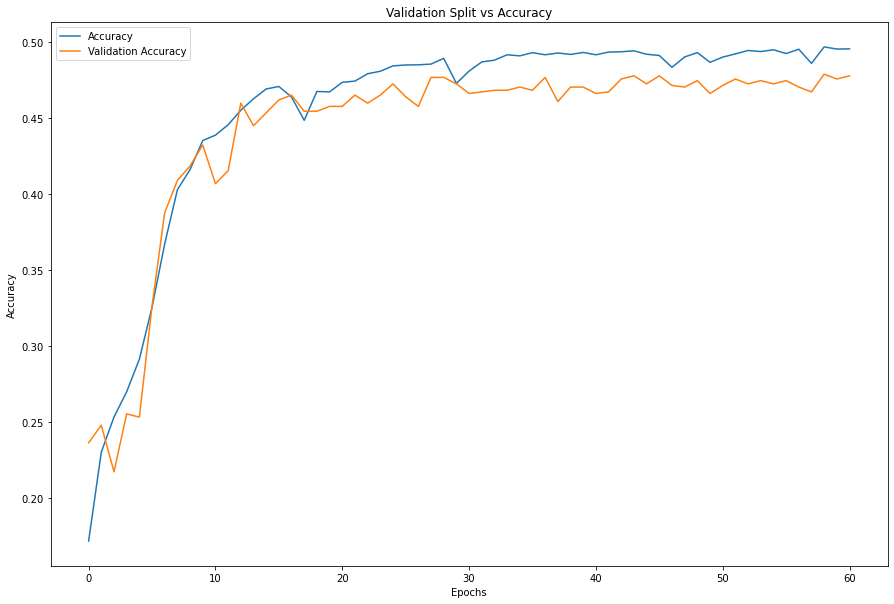

In [81]:
# Plot the validation split against accuracy to verify the model is not overfitting
plt.plot(fit_model_1.history['accuracy'])
plt.plot(fit_model_1.history['val_accuracy'])
plt.legend(['Accuracy','Validation Accuracy'])
plt.title("Validation Split vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

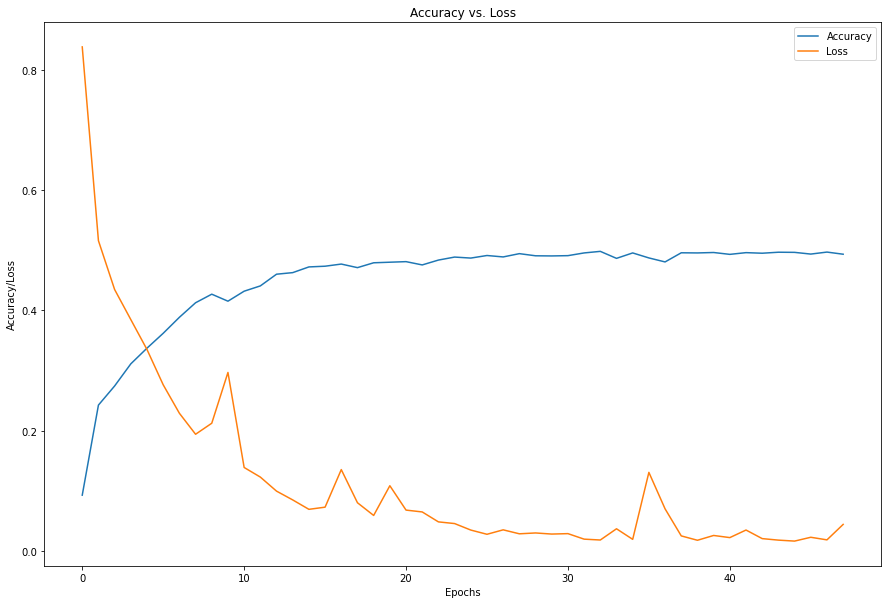

In [82]:
# Plot the accuracy against loss to verify accuracy increasing while loss decreasing
plt.plot(fit_model_4.history['accuracy'])
plt.plot(fit_model_4.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.title("Accuracy vs. Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy/Loss")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [83]:
# Make predictions for 10 season 3 hidden layer 
predictions = (neural_network_4.predict(X_test_scaled_4) > 0.5).astype("int32")

# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test_4})

# Display sample data
results.head(10)

49/49 [==============================] - 0s 827us/step


,predictions,actual
5046,1,1.0
1714,0,-1.0
1394,0,-1.0
2721,0,-1.0
758,0,-1.0
5533,1,1.0
433,0,-1.0
5867,1,1.0
3285,0,-1.0
4584,1,1.0


## Report for Part 4:
With 5 seasons of learning data scaled, using four hidden layers with LeakyReLU activation, outer layer linear activation, and 60 epochs, we are receiving about a 46% accuracy.  The linear activation seems to be making the biggest difference. We also notice that the loss is astronomically lower with this actvation.